# Exercícios em Python: Linhas de Transmissão

Instituto Federal de Santa Catarina

Engenharia de Telecomunicações

Autor: Roberto da Silva Espindola

Este caderno contém exercícios de eletromagnetismo utilizando a linguagem de programação Python. Ele se baseia no livro "Eletromagnetismo" de William Hayt. 

![Python symbol](https://www.python.org/static/img/python-logo.png)

No decorrer do caderno, abordaremos os seguintes tópicos:

- Exemplo - 10.1
- Exemplo - 10.2
- Exemplo - 10.3
- Exercício - 10.1
- Exercício - 10.4
- Exercício - 10.7
- Exercício - 10.13


Este exemplo foi extraído do livro "Eletromagnetismo" de William H. Hayt Jr. e John A. Buck, página 328.

**Exemplo 10.1** -- Duas ondas de tensão que possuem frequências e amplitudes iguais se propagam em sentidos opostos em uma linha de transmissão sem perdas. Determine a tensão total em função do tempo e da posição.

Solução:

Quando temos duas ondas de tensão que têm a mesma frequência, mas estão se movendo em direções opostas em uma linha de transmissão, podemos combiná-las usando suas representações fasoriais.

A forma fasorial é uma maneira de representar ondas como números complexos, o que facilita a combinação e manipulação das ondas. Para essas duas ondas, vamos considerar:

* Uma onda que se move para a direita: 

$$V_0e^{-\textit{j}\beta z}$$

* Uma onda que se move para a esquerda: 

$$V_0e^{+\textit{j}\beta z}$$


Quando combinamos essas duas ondas, a soma delas é:

$$V_\textit{sT}(z) = V_0e^{-\textit{j}\beta z} + V_0e^{+\textit{j}\beta z}$$

Usando propriedades dos números complexos, podemos simplificar isso para: 

$V_\textit{sT}(z) = 2 V_0~\cos(\beta z)$



Para obter a forma instantânea real da tensão, precisamos considerar a oscilação no tempo. A tensão total $V(z,t)$ pode ser representada como a parte real da expressão combinada:

$$V(z,t) = Re[2V_0~\cos(\beta z)e^{\textit{j}\omega t}] = 2V_0~\cos(\beta z) \cos(\omega t)$$

O resultado é uma onda estacionária. 

Em uma onda estacionária:
* Amplitude: A amplitude da onda varia ao longo do espaço com $\cos(\beta z)$.
* Oscilação no Tempo: A onda oscila no tempo com $\cos⁡(\omega t)$.


#### Gráfico gerado da tensão total: 


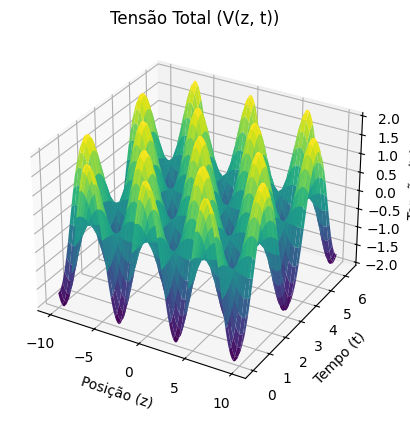

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir constantes
V0 = 1.0       # Amplitude da onda
omega = 2.0    # Frequência angular (rad/s)
beta = 1.0     # Constante de fase (rad/m)

# Definir a função que calcula a tensão total
def V_total(z, t):
    return 2 * V0 * np.cos(beta * z) * np.cos(omega * t)

# Definir os vetores de posição (z) e tempo (t)
z = np.linspace(-10, 10, 200)   # 200 pontos de -10 a 10
t = np.linspace(0, 2 * np.pi, 200)  # 200 pontos de 0 a 2π

# Criar a grade de valores de z e t para o cálculo da tensão
Z, T = np.meshgrid(z, t)
V = V_total(Z, T)

# Plot da tensão total em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Z, T, V, cmap='viridis')

# Configurar rótulos e título
ax.set_xlabel("Posição (z)")
ax.set_ylabel("Tempo (t)")
ax.set_zlabel("Tensão (V)")
ax.set_title("Tensão Total (V(z, t))")

# Mostrar o gráfico
plt.show()


#### Gráfico gerado do mapa de calor da tensão: 


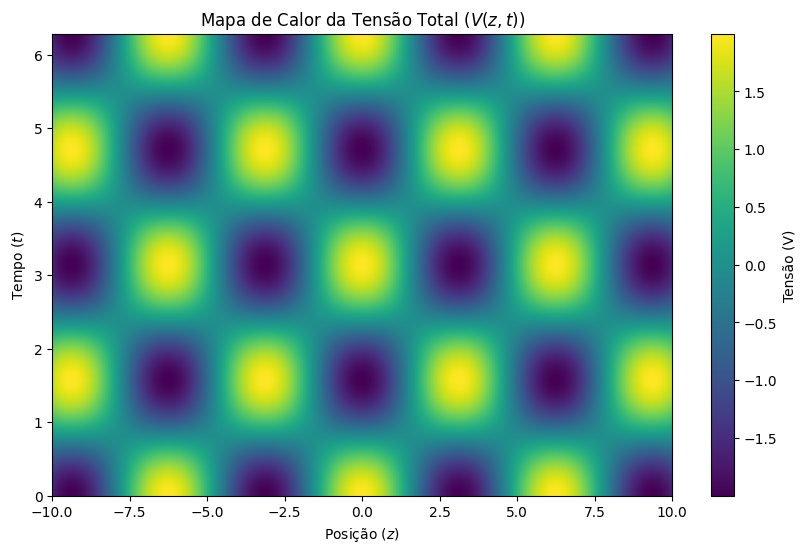

In [7]:
# Plot do mapa de calor (heatmap)
plt.figure(figsize=(10, 6))
plt.imshow(V, extent=[z.min(), z.max(), t.min(), t.max()], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Tensão (V)')
plt.xlabel("Posição ($z$)")
plt.ylabel("Tempo ($t$)")
plt.title("Mapa de Calor da Tensão Total ($V(z, t)$)")

# Mostrar o gráfico
plt.show()


#### Gráfico gerado do corte da onda para um valor fixo de posição: 


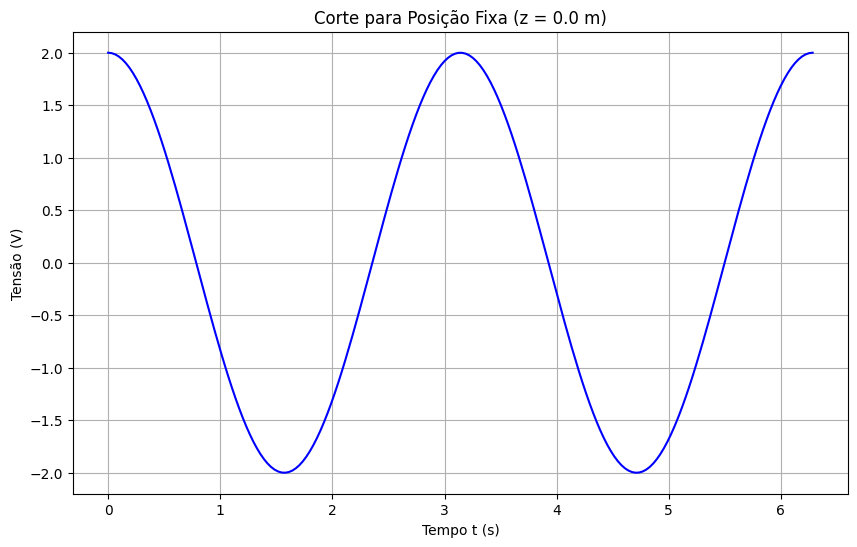

In [14]:
# Definir os vetores de tempo (t) e a posição fixa (z)
t = np.linspace(0, 2*np.pi, 200)   # 200 pontos de 0 a 2π
z_fixo = 0.0                    # Posição fixa
V_t_fixo = [V_total(z_fixo, ti) for ti in t]

# Plot do corte para um valor fixo de posição
plt.figure(figsize=(10, 6))
plt.plot(t, V_t_fixo, label=f'z = {z_fixo}', color='blue')
plt.xlabel("Tempo t (s)")
plt.ylabel("Tensão (V)")
plt.title(f"Corte para Posição Fixa (z = {z_fixo} m)")
plt.grid(True)

# Mostrar o gráfico
plt.show()


#### Gráfico gerado do corte da onda para um valor fixo de tempo:

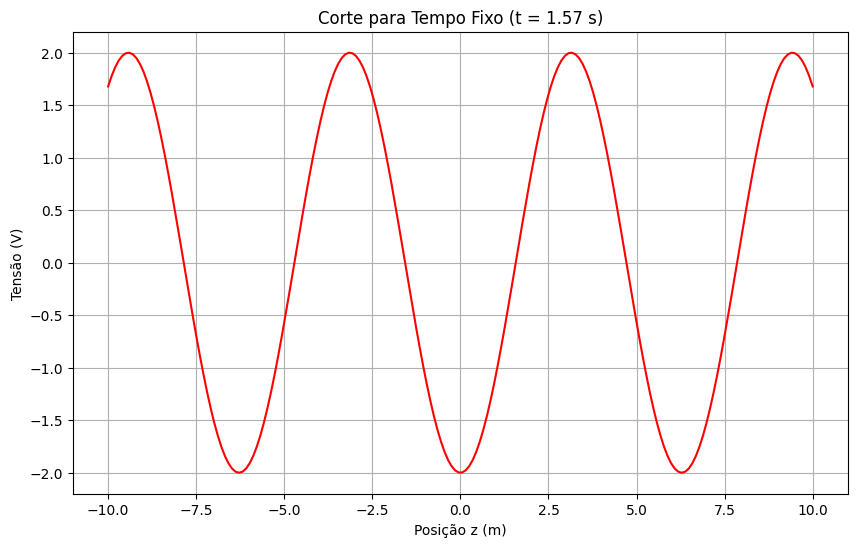

In [15]:
# Definir os vetores de posição (z) e tempo fixo (t)
z = np.linspace(-10, 10, 200)   # 200 pontos de -10 a 10
t_fixo = np.pi / 2.0            # Tempo fixo
V_z_fixo = [V_total(zi, t_fixo) for zi in z]

# Plot do corte para um valor fixo de tempo
plt.figure(figsize=(10, 6))
plt.plot(z, V_z_fixo, label=f't = {t_fixo:.2f}', color='red')
plt.xlabel("Posição z (m)")
plt.ylabel("Tensão (V)")
plt.title(f"Corte para Tempo Fixo (t = {t_fixo:.2f} s)")
plt.grid(True)

# Mostrar o gráfico
plt.show()


## Exemplo 10.2

Este exemplo foi extraído do livro "Eletromagnetismo" de William H. Hayt Jr. e John A. Buck, página 329.

**Exemplo 10.2** -- Uma linha de transmissão sem perdas de 80 cm de comprimento opera em uma frequência de 600 MHz. Os parâmetros de linha são $\textit{L} = 0{,}25~\mu\text{H/m}$ e $\textit{C} = 100~\text{pF/m}$. Calcule a impedância característica, a constante de defasamento e a velocidade de fase.

**Fórmulas usadas:**

**1** -- Impedância característica: 

$$Z_0 = \sqrt{\frac{R+j\omega L}{G+j\omega C}}$$

**2** -- Velocidade de fase: 

$$v_p = \frac{1}{\sqrt{L\cdot C}}$$

**3** -- Frequência Angular: 

$$\omega = 2\pi f$$

Em que $f$ é a frequência em Hz.

**4** -- Constante de Defasamento: 

$$\beta = \frac{\omega}{v_p}$$



In [5]:
import numpy as np

# Definir constantes
L = 0.25e-6  # Indutância por metro (H/m)
C = 100e-12  # Capacitância por metro (F/m)
f = 600e6    # Frequência (Hz)

# Calcular a impedância característica Z₀
Z0 = np.sqrt(L / C)

# Calcular a velocidade de fase vₚ
vp = 1 / np.sqrt(L * C)

# Calcular a frequência angular ω
omega = 2 * np.pi * f

# Calcular a constante de defasamento β
beta = omega / vp

# Imprimir os resultados
print(f"Impedância característica (Z₀): {Z0:.2f} Ω")
print(f"Velocidade de fase (vₚ): {vp:.2e} m/s")
print(f"Constante de defasamento (β): {beta:.2f} rad/m")


Impedância característica (Z₀): 50.00 Ω
Velocidade de fase (vₚ): 2.00e+08 m/s
Constante de defasamento (β): 18.85 rad/m


## Exemplo 10.3

Este exemplo foi extraído do livro "Eletromagnetismo" de William H. Hayt Jr. e John A. Buck, página 333.

**Exemplo 10.3 --** Em uma frequência angular de operação de 500 Mrad/s,valores típicos de circuitos para certa linha de transmissão são: $R = 0{,}2~\Omega\text{/m}$, $L = 0{,}25~ \mu\text{H/m}$, $G = 10~\mu\text{S/m}$ e $C = 100~\text{pF/m}$. Calcule: a)$\alpha$; b)$\beta$; c)$\lambda$; d)$v_p$; e)$Z_0$.

**Solução:**

É importante mencionar que as fórmulas utilizadas são baseadas em aproximações válidas para o regime de baixas perdas. Isso significa que assumimos que as perdas resistivas e condutivas na linha de transmissão são pequenas em comparação com as reatâncias indutivas e capacitivas.

**a** -- Constante de Atenuação: 

$$\alpha \approx \frac{R}{2}\sqrt{\frac{C}{L}}+\frac{G}{2}\sqrt{\frac{L}{C}}$$

**b** -- Constante de Fase:

$$\beta \approx \omega\sqrt{LC}$$

**c** -- Comprimento de Onda: 

$$\lambda = \frac{2\pi}{\beta}$$

**d** -- Velocidade de fase: 

$$v_p = \frac{\omega}{\beta}$$

**e** -- Impedancia característica: 

$$Z_0 = \sqrt{\frac{R+j\omega L}{G+j\omega C}}$$


In [18]:
import numpy as np

# Definir constantes
R = 0.2                # Resistência por metro (Ω/m)
L = 0.25e-6            # Indutância por metro (H/m)
G = 10e-6              # Condutância por metro (S/m)
C = 100e-12            # Capacitância por metro (F/m)
ω = 500e6              # Frequência angular (rad/s)

# Calcular a constante de atenuação α
α = (R / 2) * np.sqrt(C / L) + (G / 2) * np.sqrt(L / C)

# Calcular a constante de fase β
β = ω * np.sqrt(L * C)

# Calcular o comprimento de onda λ
λ = 2 * np.pi / β

# Calcular a velocidade de fase vₚ
vₚ = ω / β

# Calcular a impedância característica Z₀
Z_0 = np.sqrt((R + 1j * ω * L) / (G + 1j * ω * C))

# Imprimir os resultados formatados
print(f"Constante de atenuação (α): {α * 1e3:.2f} mNp/m")  # Convertendo para mNp/m
print(f"Constante de fase (β): {β:.2f} rad/m")
print(f"Comprimento de onda (λ): {λ:.2f} m")
print(f"Velocidade de fase (vₚ): {vₚ:.2e} m/s")
print(f"Impedância característica (Z₀): {Z_0.real:g} {Z_0.imag:g}j Ω")


Constante de atenuação (α): 2.25 mNp/m
Constante de fase (β): 2.50 rad/m
Comprimento de onda (λ): 2.51 m
Velocidade de fase (vₚ): 2.00e+08 m/s
Impedância característica (Z₀): 50 -0.035j Ω


## Exercício 10.1

Os parâmetros de certa linha de transmissão, operando em $\omega = 6 × 108$ rad/s, são: $L = 0,35~\mu \text{H/m}$, $C = 40~\text{pF/m}$, $G = 75~\mu\text{S/m}$ e $R = 17~\Omega\text{/m}$. Calcule $\gamma, \alpha, \beta, \lambda ~e~ Z_0$.

**Fórmulas:**

**a** -- Constante de propagação complexa: 

$$\gamma = \sqrt{(R + j\omega L)(G + j\omega C)}$$

**b** -- Constante de atenuaçãp:

$$\alpha = \Re(\gamma)$$

**c** -- Constante de fase: 

$$\beta = \Im(\gamma)$$

**d** -- Comprimento de Onda: 

$$\lambda = \frac{2\pi}{\beta}$$

**e** -- Impedancia característica: 

$$Z_0 = \sqrt{\frac{R+j\omega L}{G+j\omega C}}$$


In [ ]:
import numpy as np

# Definir constantes
L = 0.35e-6  # Indutância por metro (H/m)
C = 40e-12   # Capacitância por metro (F/m)
G = 75e-6    # Condutância por metro (S/m)
R = 17       # Resistência por metro (Ω/m)
omega = 6e8  # Frequência angular (rad/s)

# Calcular a constante de propagação complexa γ
gamma = np.sqrt((R + 1j * omega * L) * (G + 1j * omega * C))

# Calcular a constante de atenuação α (parte real de γ)
alpha = np.real(gamma)

# Calcular a constante de fase β (parte imaginária de γ)
beta = np.imag(gamma)

# Calcular o comprimento de onda λ
lambda_wave = 2 * np.pi / beta

# Calcular a impedância característica Z₀
Z0 = np.sqrt((R + 1j * omega * L) / (G + 1j * omega * C))

# Imprimir os resultados formatados
print(f"Constante de propagação (γ): {gamma.real:.3f} + {gamma.imag:.3f}j")
print(f"Constante de atenuação (α): {alpha:.3f} Np/m")
print(f"Constante de fase (β): {beta:.2f} rad/m")
print(f"Comprimento de onda (λ): {lambda_wave:.2f} m")
print(f"Impedância característica (Z₀): {Z0.real:.2f} {Z0.imag:+.4f}j Ω")


Constante de propagação (γ): 0.094 + 2.247j
Constante de atenuação (α): 0.094 Np/m
Constante de fase (β): 2.25 rad/m
Comprimento de onda (λ): 2.80 m
Impedância característica (Z₀): 93.62 -3.6368j Ω


## Exercício 10.4

Uma onda de tensão senoidal de amplitude $V_0$, frequência $\omega$ e constante de fase $\beta$ propaga no sentido crescente de $z$ em direção à extremidade aberta de uma carga, em uma linha de transmissão sem perdas de impedância característica $Z_0$. Na extremidade, a onda reflete totalmente com deslocamento de fase zero, e a onda refletida interfere com a incidente, de tal forma a produzir um padrão de onda estacionária em todo o comprimento da linha (Ver Exemplo 10.1). Determine o padrão de onda estacionária para a corrente na linha. Expresse o resultado na forma instantânea real e simplificada.

Para determinar o padrão de onda estacionária para a corrente na linha de transmissão, precisamos considerar as características da onda de tensão e a impedância característica da linha. Vamos começar com a onda de tensão e, a partir dela, derivar a expressão para a corrente.


### Passo a Passo

1. **Onda de Tensão na Forma Fasorial**:
   - A onda de tensão incidente é dada por:
    
$$V_i(z, t) = V_0 e^{j(\omega t - \beta z)}$$
   
- A onda de tensão refletida é dada por:

$$V_r(z, t) = V_0 e^{j(\omega t + \beta z)}$$

   - A tensão total na linha é a soma das ondas incidente e refletida:

     $$V(z, t) = V_i(z, t) + V_r(z, t)$$
     
2. **Combinação das Ondas**:
   - A combinação das ondas incidente e refletida resulta em uma onda estacionária:

     $$V(z, t) = V_0 e^{j(\omega t - \beta z)} + V_0 e^{j(\omega t + \beta z)}$$
     
   - Usando a identidade de Euler, podemos reescrever essa soma:

$$V(z, t) = V_0 \left(e^{j\omega t} e^{-j\beta z} + e^{j\omega t} e^{j\beta z}\right)$$
     
$$V(z, t) = V_0 e^{j\omega t} \left(e^{-j\beta z} + e^{j\beta z}\right)$$

$$V(z, t) = V_0 e^{j\omega t} \cdot 2\cos(\beta z)$$
     
   - Convertendo para a forma real:
     
$$V(z, t) = 2V_0 \cos(\beta z) \cos(\omega t)$$
     

3. **Corrente na Linha de Transmissão**:

   - Usamos a impedância característica  $Z_0$ para relacionar tensão e corrente.

   - A corrente incidente é:

$$I_i(z, t) = \frac{V_0}{Z_0} e^{j(\omega t - \beta z)}$$

   - A corrente refletida é:

$$I_r(z, t) = -\frac{V_0}{Z_0} e^{j(\omega t + \beta z)}$$

(o sinal negativo ocorre devido à reflexão em uma extremidade aberta).
   - A corrente total é a soma das correntes incidente e refletida:

$$I(z, t) = I_i(z, t) + I_r(z, t)$$


4. **Combinação das Correntes**:
   - A combinação das correntes incidente e refletida resulta em:

$$I(z, t) = \frac{V_0}{Z_0} e^{j(\omega t - \beta z)} - \frac{V_0}{Z_0} e^{j(\omega t + \beta z)}$$

   - Usando a identidade de Euler, podemos reescrever essa soma:
     
$$I(z, t) = \frac{V_0}{Z_0} e^{j\omega t} \left(e^{-j\beta z} - e^{j\beta z}\right)$$
 

$$I(z, t) = \frac{V_0}{Z_0} e^{j\omega t} \cdot (-2j \sin(\beta z))$$

   - Convertendo para a forma real:

$$I(z, t) = -\frac{2V_0}{Z_0} \sin(\beta z) \sin(\omega t)$$


### Resultado

O padrão de onda estacionária para a corrente na linha, na forma instantânea real e simplificada, é dado por:


$$I(z, t) = -\frac{2V_0}{Z_0} \sin(\beta z) \sin(\omega t)$$


Esse resultado mostra que a corrente na linha de transmissão varia espacialmente com $\sin(\beta z)$ e temporalmente com $\sin(\omega t)$, formando um padrão de onda estacionária.

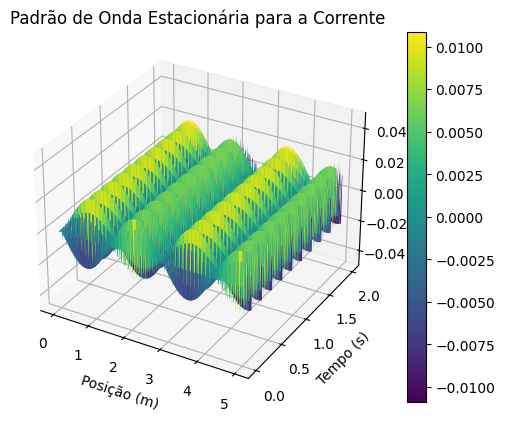

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir constantes
V0 = 1.0  # Amplitude da onda de tensão (V)
omega = 6e8  # Frequência angular (rad/s)
beta = 2.25  # Constante de fase (rad/m)
Z0 = 93.6 - 3.64j  # Impedância característica (Ω)

# Definir uma função para calcular a corrente instantânea real
def corrente(z, t, V0, beta, omega, Z0):
    return -2 * V0 / np.abs(Z0) * np.sin(beta * z) * np.sin(omega * t)

# Gerar dados para visualização
z = np.linspace(0, 5, 200)  # Posição ao longo da linha de transmissão (reduzida para 0 a 5 m)
t = np.linspace(0, 2, 200)   # Tempo (s)

# Criar uma grade para z e t
Z, T = np.meshgrid(z, t)

# Calcular a corrente ao longo da linha e no tempo
I = corrente(Z, T, V0, beta, omega, Z0)

# Plotar a corrente ao longo da linha de transmissão
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Z, T, I, cmap='viridis')

# Configurar rótulos, título e limites dos eixos
ax.set_xlabel('Posição (m)')
ax.set_ylabel('Tempo (s)')
ax.set_zlabel('Corrente (A)')
ax.set_title('Padrão de Onda Estacionária para a Corrente')
ax.set_zlim(-0.05, 0.05)  # Limitar a corrente para melhorar a visualização

# Mostrar o gráfico
plt.colorbar(surf)
plt.show()


## Exercício 10.7

Neste problema, precisamos calcular a perda total de potência ao longo das duas linhas de transmissão e na junção e vamos usar a fórmula de atenuação em dB para cada segmento da linha de transmissão e somar todas as perdas.

### Passos para calcular a potência no receptor

1. **Calcular a perda de potência na linha 1**:
   - Perda da linha 1: 

$$0,1 \text{ dB/m} \times 40 \text{ m} = 4 \text{ dB}$$

2. **Calcular a perda de potência na linha 2**:
   - Perda da linha 2: 

$$0,2 \text{ dB/m} \times 25 \text{ m} = 5 \text{ dB}$$

3. **Somar todas as perdas**:
   - Perda total: 

$$4 \text{ dB} + 5 \text{ dB} + 2 \text{ dB} = 11 \text{ dB}$$

4. **Calcular a relação de potência**:
   - Relação de potência em escala linear: 

$$10^{\frac{-11}{10}}$$

5. **Calcular a potência no receptor**:
   - Potência no receptor: 

$$100 \text{ mW} \times 10^{\frac{-11}{10}}$$

In [ ]:
# Definir as constantes
potencia_transmitida = 100.0  # Potência transmitida em mW
perda_linha1 = 0.1  # Perda da linha 1 em dB/m
comprimento_linha1 = 40.0  # Comprimento da linha 1 em m
perda_linha2 = 0.2  # Perda da linha 2 em dB/m
comprimento_linha2 = 25.0  # Comprimento da linha 2 em m
perda_juncao = 2.0  # Perda de contato na junção em dB

# Calcular a perda de potência na linha 1
perda_total_linha1 = perda_linha1 * comprimento_linha1

# Calcular a perda de potência na linha 2
perda_total_linha2 = perda_linha2 * comprimento_linha2

# Calcular a perda total de potência
perda_total = perda_total_linha1 + perda_total_linha2 + perda_juncao

# Calcular a relação de potência em escala linear
relacao_potencia = 10 ** (-perda_total / 10)

# Calcular a potência no receptor
potencia_receptor = potencia_transmitida * relacao_potencia

# Imprimir os resultados
print(f"Potência no receptor: {potencia_receptor:.2f} mW")


Potência no receptor: 7.94 mW


## Exercício 10.13

A onda de tensão incidente em certa linha de transmissão sem perdas para a qual $Z_0 = 50~\Omega$  e $v_p = 2 × 10^8~\text{m/s}$ é $V^+(z, t) = 200\cos(\omega t – \pi z) V$. (a) Calcule $\omega$. (b) Calcule $I^+(z, t)$. A seção de linha para a qual $z > 0$ é substituída por uma carga $Z_L = 50 + j30~\Omega$ em $z = 0$. Calcule: (c) $\Gamma_\text{L}$; (d) $V_s^–(z)$; (e) $V_s~\text{em}~z = – 2,2~\text{m}$.

#### Onda de Tensão Incidente

A expressão da onda de tensão incidente é dada por:

$V^+(z, t) = V_0 \cos (\omega t - \beta z)$

em que:
-  $V_0$ é a amplitude da onda de tensão.

-  $\omega$ é a frequência angular.

-  $\beta$ é a constante de defasamento.

-  $z$ é a posição ao longo da linha de transmissão.

-  $t$ é o tempo.

#### Constantes Calculadas

- Frequência Angular $\omega$:

$$\omega = \beta \cdot v_p$$

- Corrente Incidente $I^+(z, t)$:

$$I_0 = \frac{V_0}{Z_0} $$

- Coeficiente de Reflexão $\Gamma_L$:

$$\Gamma_L = \frac{Z_L - Z_0}{Z_L + Z_0}$$

- Onda Refletida $V^-(z)$:

$$V_S^-(z) = V_0 \cdot \Gamma_L \cdot e^{j(\beta_z + \text{fase inicial})}$$

- Tensão Total em $z = -2.2 \, \text{m}$:

$$V_s = V^+(z) + V^-(z)$$

Em que: 

- $V^+(z) = V_0 \cdot \cos(\omega t - \beta z) $
- $V^-(z) = \left| V_s^-(z) \right| \cdot (\cos(fase) + j sen(fase)) $

In [9]:
import numpy as np

# Definir constantes
V0 = 200.0           # Amplitude da onda de tensão
Z0 = 50.0            # Impedância característica
vp = 2e8             # Velocidade de fase (m/s)
beta = np.pi         # Constante de fase (rad/m)
ZL = 50 + 1j * 30    # Impedância da carga
z = -2.2             # Ponto de observação

# Calcular ω
omega = beta * vp

# Calcular I+(z, t)
I0 = V0 / Z0

# Calcular ΓL
Gamma_L = (ZL - Z0) / (ZL + Z0)
Gamma_L_mag = abs(Gamma_L)
Gamma_L_phase = np.angle(Gamma_L)

# Calcular Vs^-(z)
V_s_minus = V0 * Gamma_L * np.exp(1j * (np.pi * z + 1.28))

# Calcular Vs em z = -2.2 m
V_plus = V0 * np.cos(omega * 0 - np.pi * z)
V_minus = abs(V_s_minus) * (np.cos(np.angle(V_s_minus)) + 1j * np.sin(np.angle(V_s_minus)))
V_s = V_plus + V_minus

# Imprimir os resultados
print(f"ω: {omega:.2e} rad/s")
print(f"I+(z, t): {I0:.2f} cos(ωt - πz) A")
print(f"ΓL: {Gamma_L_mag:.3f} ∠{np.degrees(Gamma_L_phase):.2f}°")
print(f"Vs^-(z): {abs(V_s_minus):.2f} exp[j(πz + 1.28)] V")
print(f"Vs em z = -2.2 m: {abs(V_s):.2f} ∠{np.degrees(np.angle(V_s)):.2f}° V")


ω: 6.28e+08 rad/s
I+(z, t): 4.00 cos(ωt - πz) A
ΓL: 0.287 ∠73.30°
Vs^-(z): 57.47 exp[j(πz + 1.28)] V
Vs em z = -2.2 m: 151.42 ∠20.80° V


## Comparação de tempo de execução

Comparação do tempo de execução dos exercícios realizados em Julia e Python.


|      **Exercício**       | **Tempo em Julia** | **Tempo em Python** | **Diferença de Desempenho (%)** |
| :----------------------: | :----------------: | :-----------------: | :-----------------------------: |
|      Exemplo 10.1        |     0.005898 s     |      0.068593 s     | Julia foi 91.40% mais rápido.  |
|      Exemplo 10.1 mapa de calor       |     0.006112 s     |     0.018058 s      | Julia foi 66.15% mais rápido.  |
|      Exemplo 10.1 posição fixa      |     0.000165 s     |      0.007758 s      | Julia foi 97.87% mais rápido.  |
|      Exemplo 10.1 tempo fixo       |     0.000169 s     |      0.008032 s      | Julia foi 97.89% mais rápido.  |
|      Exemplo 10.2       |     0.000016 s     |     0.000017 s      | Julia foi 5.88% mais rápido.  |
|      Exemplo 10.3       |     0.000019 s     |     0.000052 s      | Julia foi 63.46% mais rápido.   |
|      Exercício 10.1      |     0.000021 s    |     0.000039 s      | Julia foi 46.15% mais rápido.   |
|      Exercício 10.4      |     0.014376 s     |     0.078476 s      | Julia foi 81.68% mais rápido.   |
|      Exercício 10.7      |     0.000005 s     |     0.000009 s      | Julia foi 44.44% mais rápido.   |
|      Exercício 10.13      |     0.000026 s    |     0.000063 s      | Julia foi 58.73% mais rápido.   |
